# Importing libraries and loading the data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from matplotlib import rcParams

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/x-Apsalar/Global_sustainable_energy_data/refs/heads/main/Data/Global_data_sustainable_energy.csv")

Data from Kaggle:
https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy?resource=download

## Basic information about the dataframe

In [3]:
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
df.tail()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.6802,10.00,11020.00046,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.0115,9.51,10340.00015,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.9858,9.83,12380.00011,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.6553,10.47,11760.00023,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857
3648,Zimbabwe,2020,52.747670,30.4,80.61,30000.0,81.90,3.40,0.0,4.19,...,2680.1318,10.00,NaN,NaN,-6.248748,1214.509820,38,390757.0,-19.015438,29.154857


In [5]:
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 3649 rows and 21 columns.


In [6]:
df.columns.tolist()

['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [7]:
df.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [9]:
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [10]:
df.nunique()

Entity                                                               176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
Value_co2_emissions_kt_by_country                  

In [11]:
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


## Statistical operations

### Correlation matrix

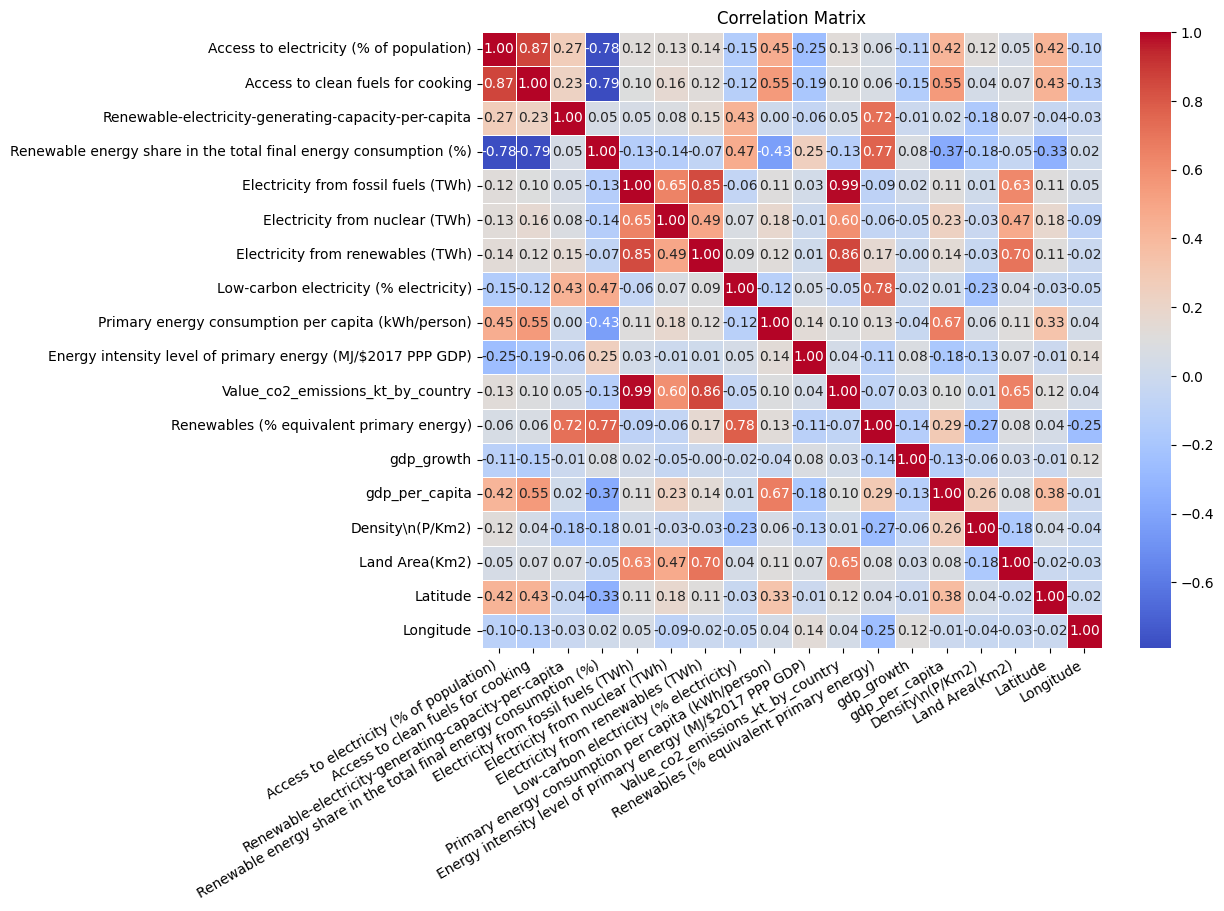

In [12]:
#Defining columns for the correlation matrix
columns_of_interest = ['Access to electricity (% of population)', 'Access to clean fuels for cooking','Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)', 'gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude', 'Longitude']

#Some of the columns had erroneous string values, so transforming all to numeric
for column in columns_of_interest:
  if column in df.columns:
    try:
      df[columns_of_interest] = df[columns_of_interest].apply(pd.to_numeric, errors='coerce')
    except ValueError:
      print(f"Column '{column}' contains non-numeric values that cannot be converted.")

#Plotting the matrix
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

### Univariate analysis

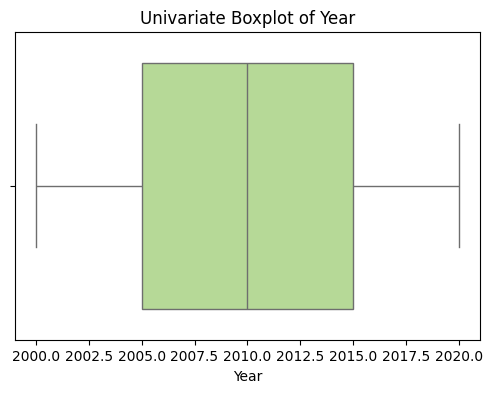

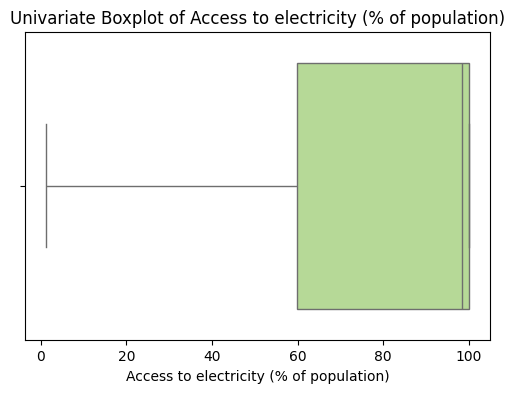

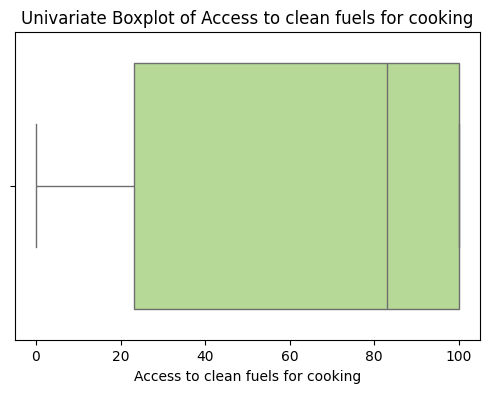

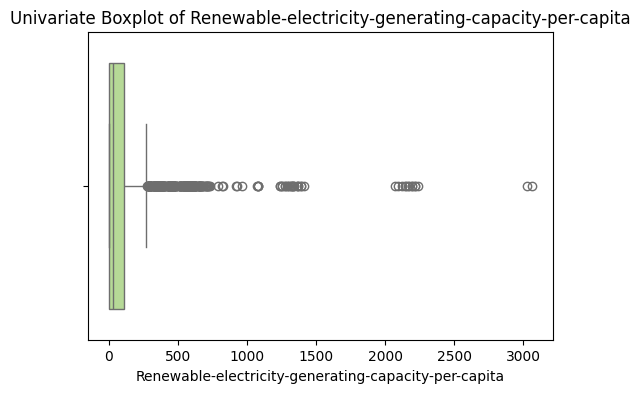

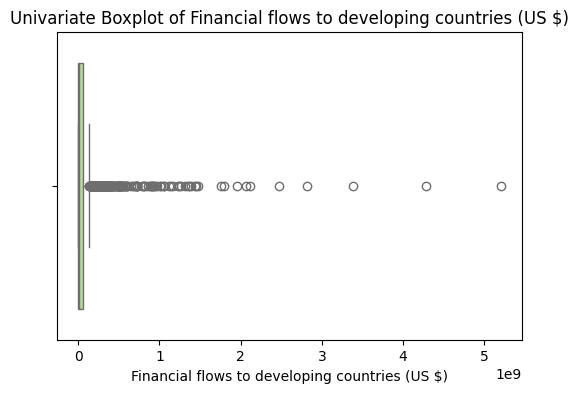

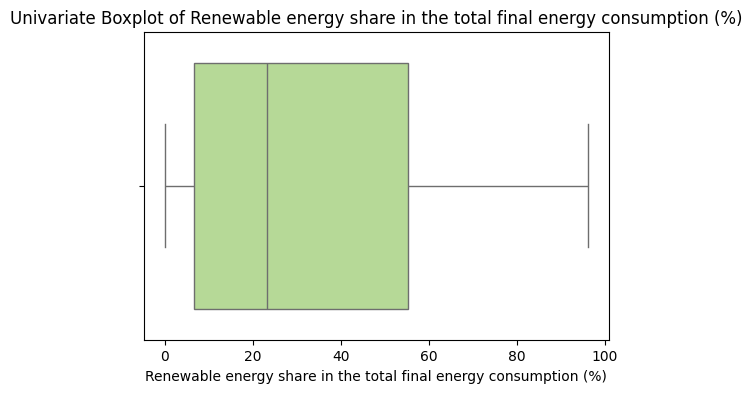

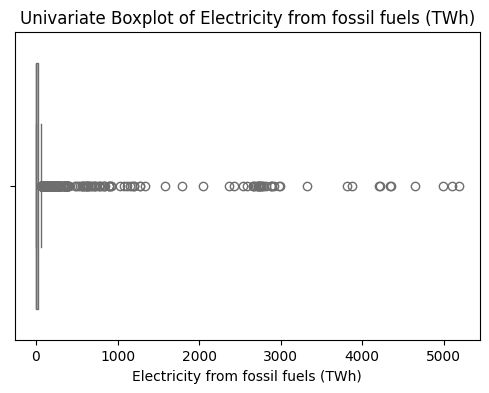

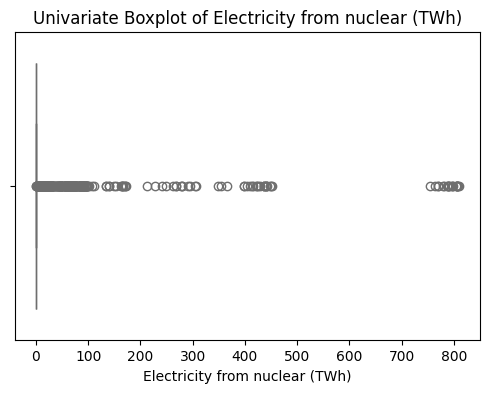

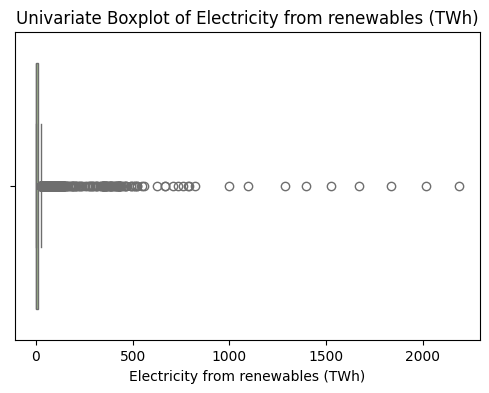

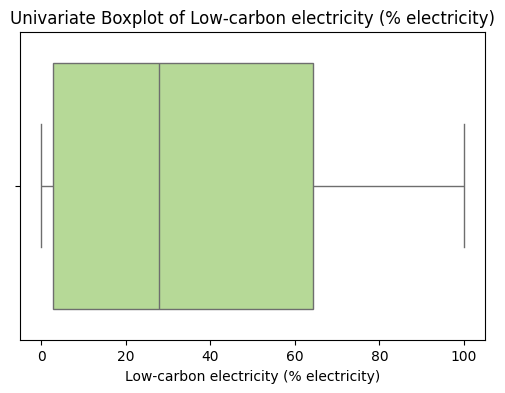

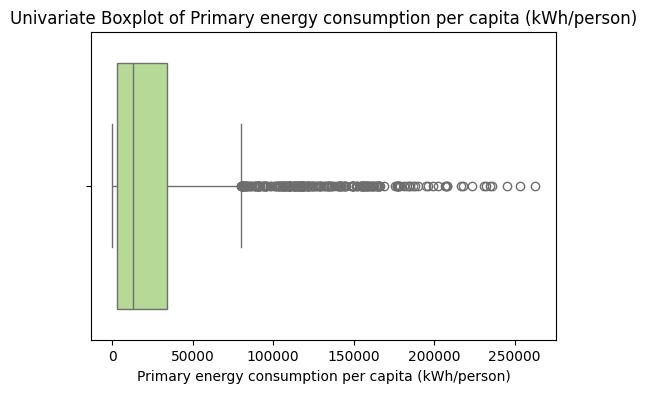

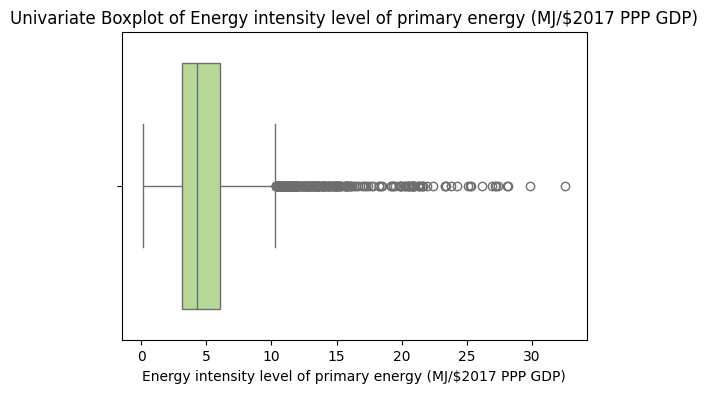

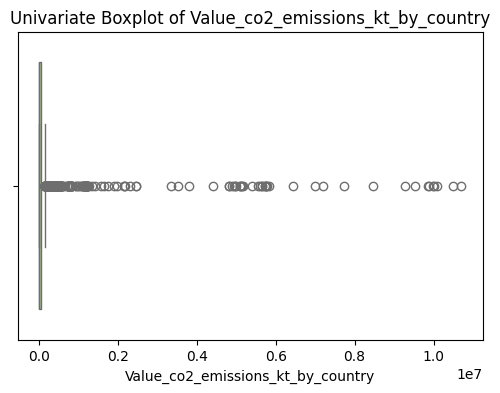

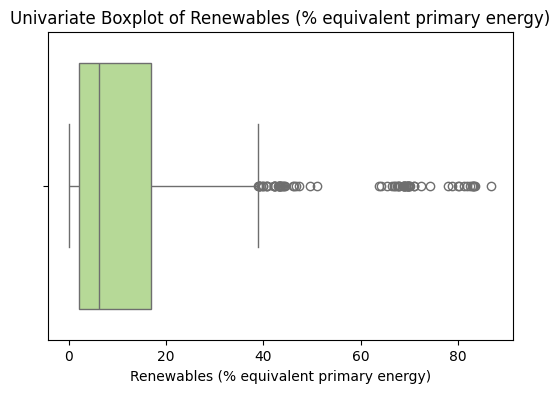

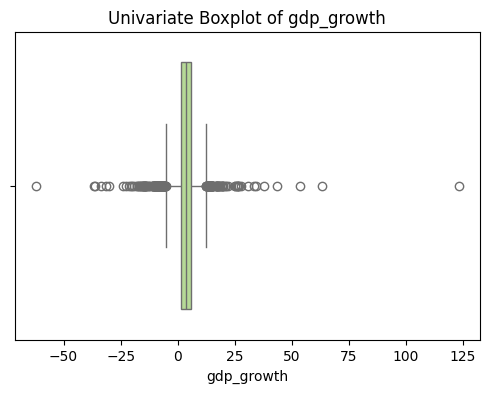

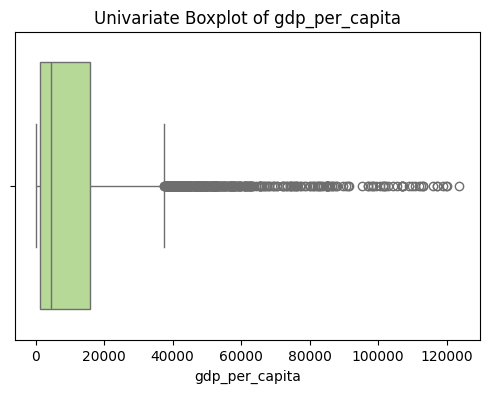

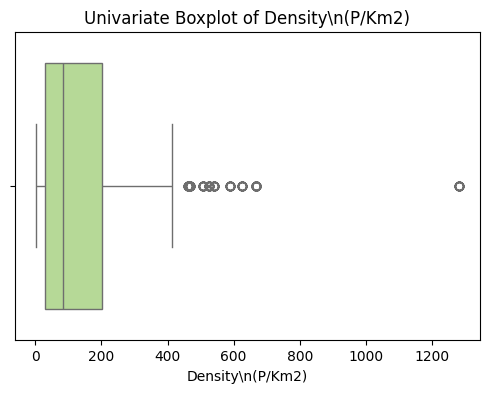

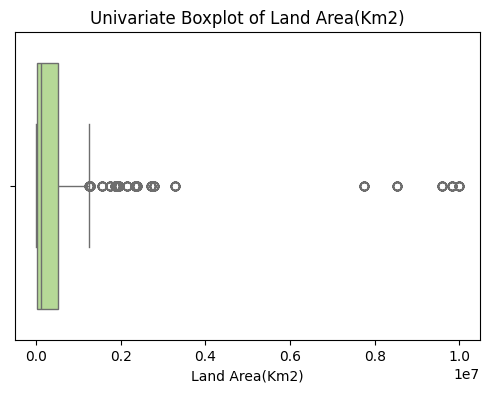

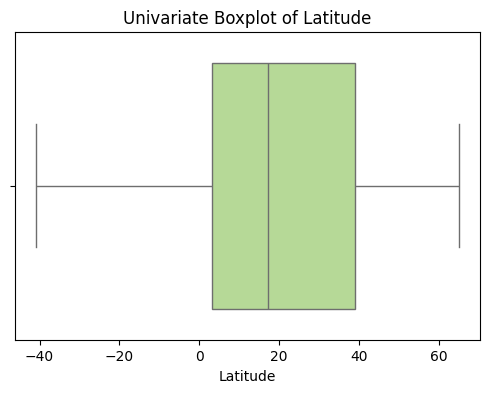

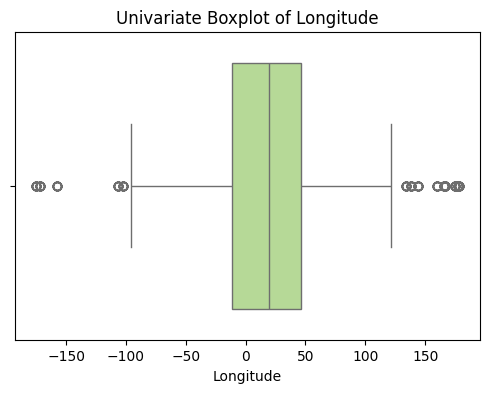

In [13]:
 for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='#b5e48c')
    plt.title(f'Univariate Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

### Histograms

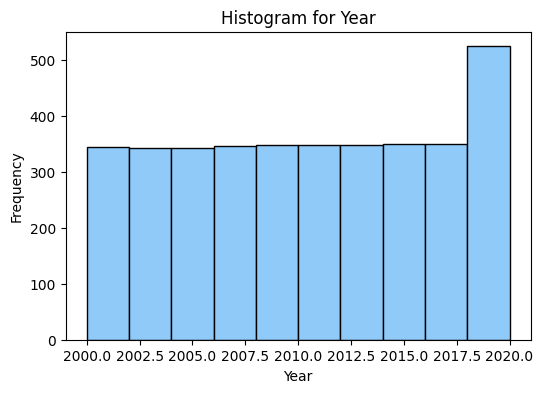

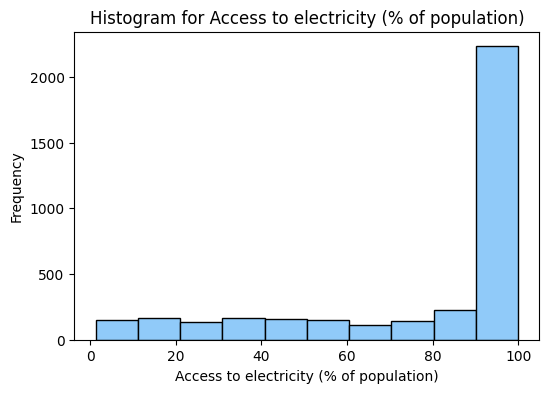

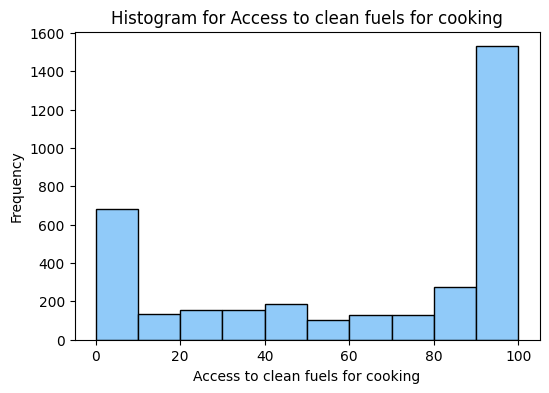

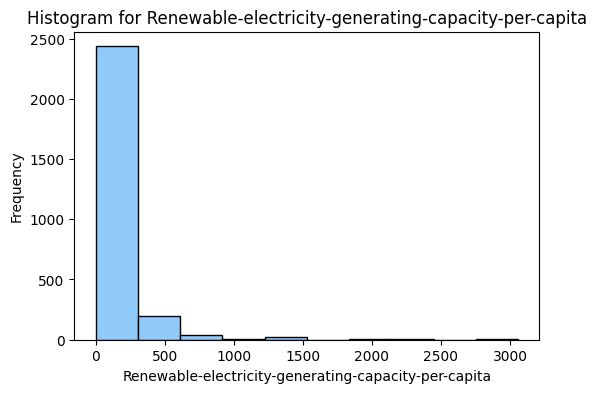

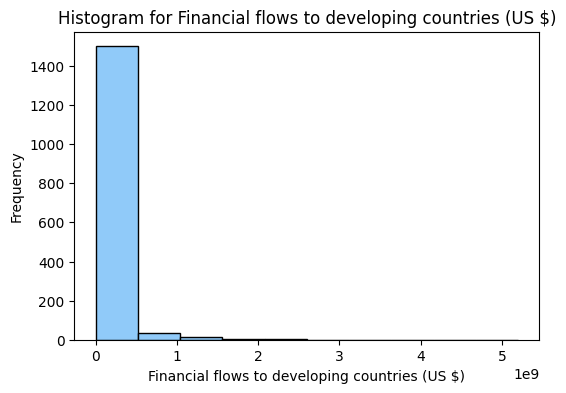

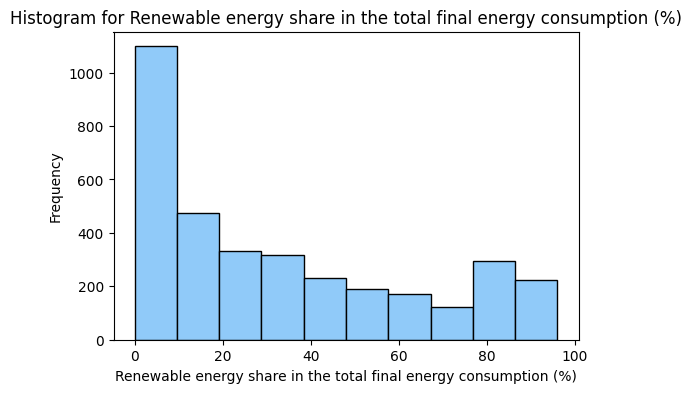

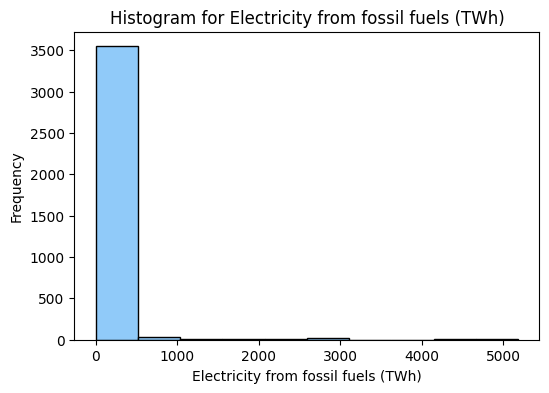

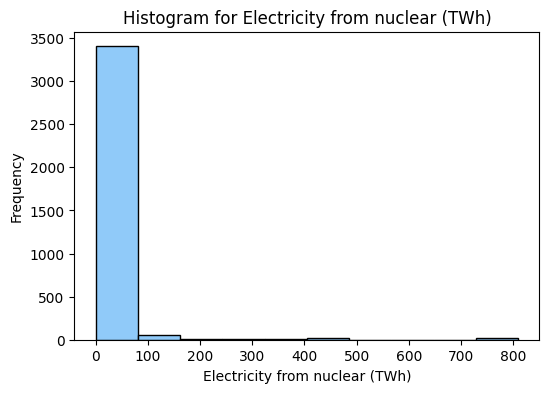

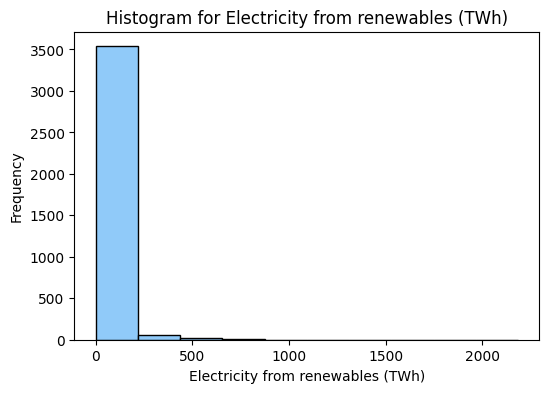

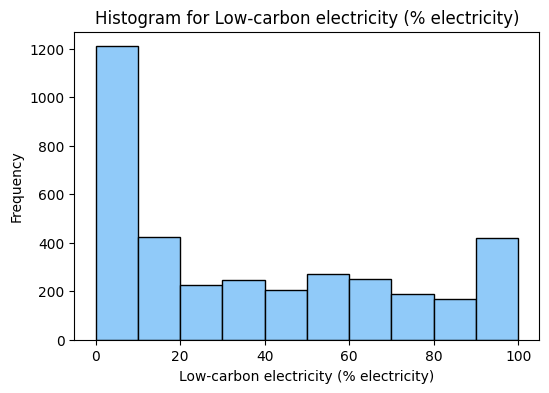

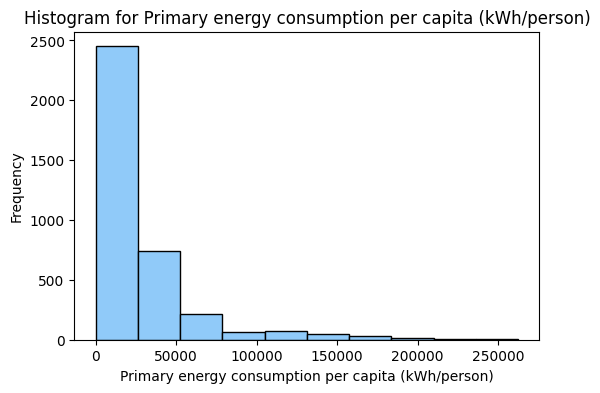

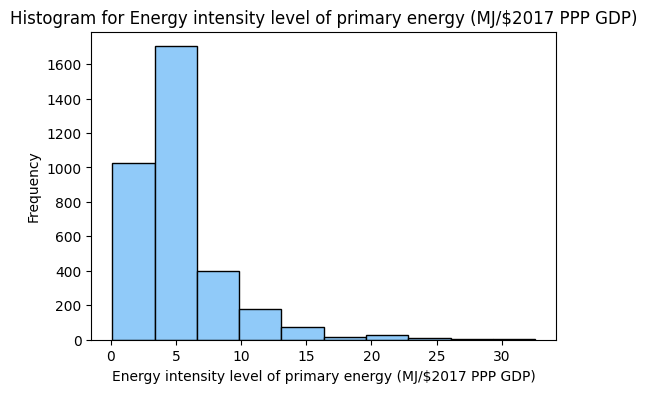

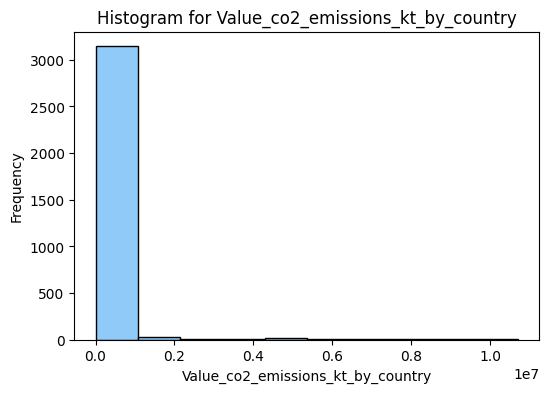

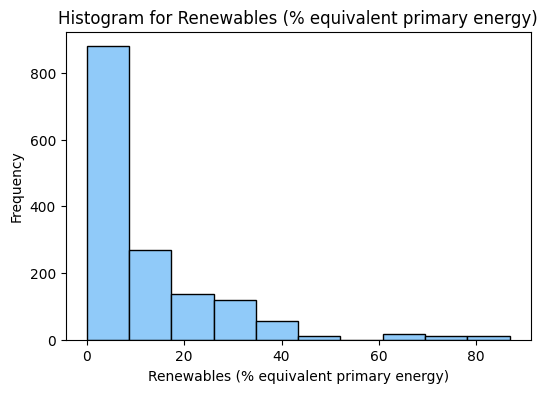

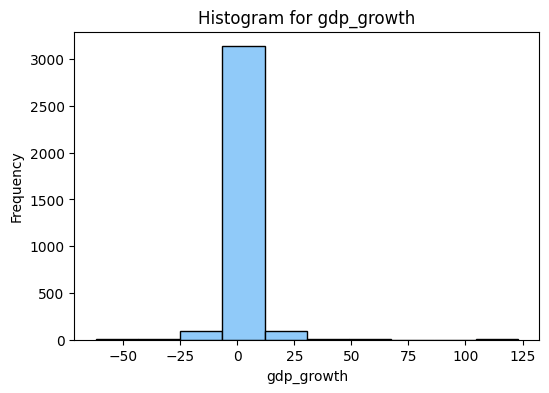

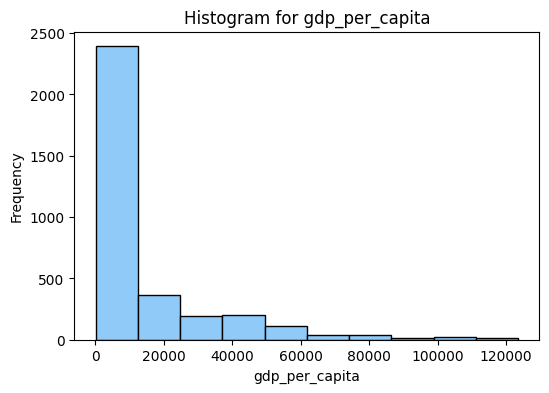

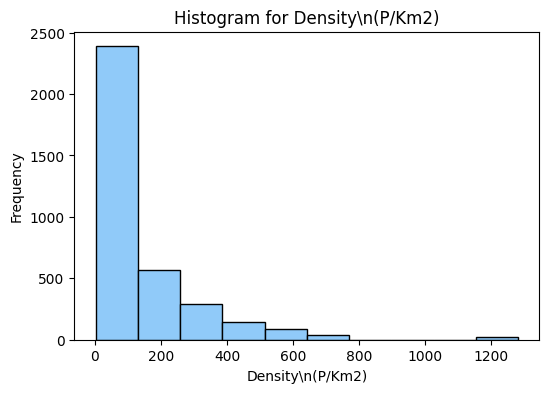

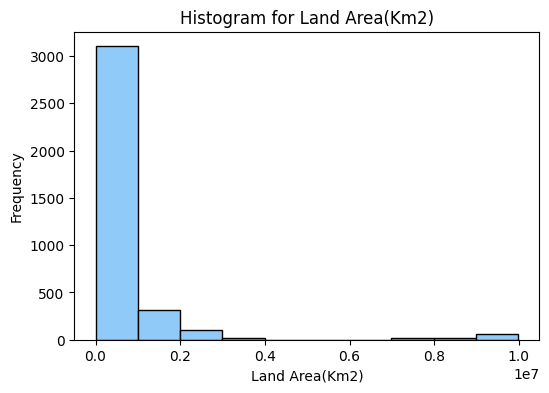

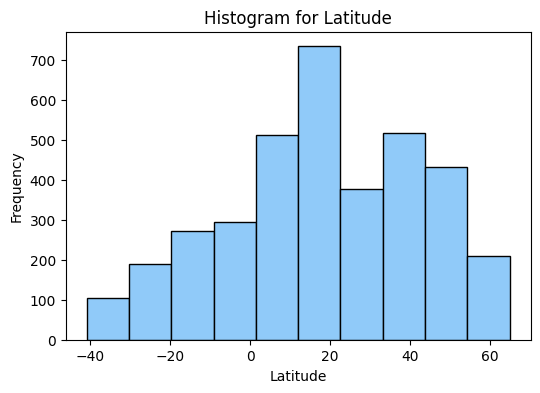

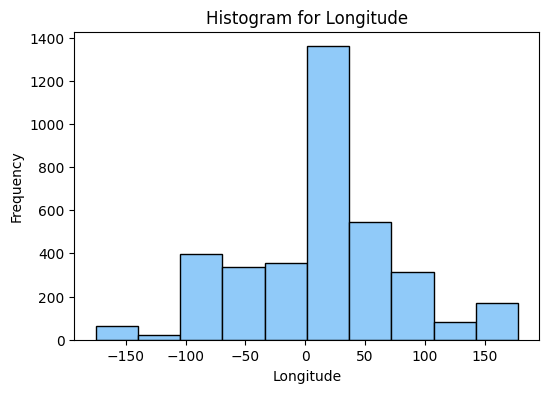

In [14]:
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=10, color='#90caf9', edgecolor='#000000')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Plotting the data

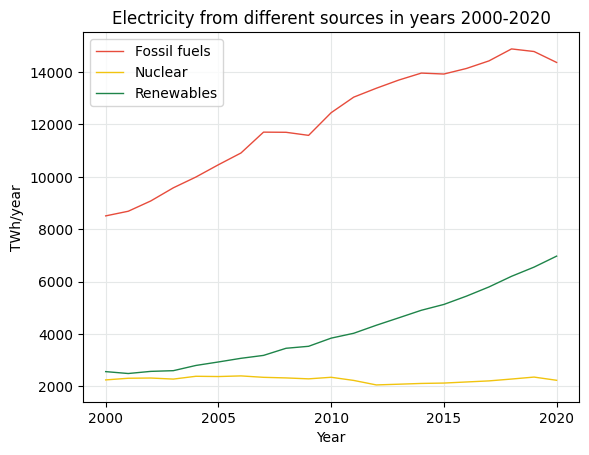

In [15]:
electricity_sources_by_year = df.groupby('Year').agg({
    'Electricity from fossil fuels (TWh)': 'sum',
    'Electricity from nuclear (TWh)': 'sum',
    'Electricity from renewables (TWh)': 'sum'
}).reset_index()
electricity_sources_by_year.columns = ['Year', 'fossil_fuels', 'nuclear', 'renewables']

plt.plot(electricity_sources_by_year['Year'], electricity_sources_by_year['fossil_fuels'], linewidth=1, color='#e74c3c', label='Fossil fuels')
plt.plot(electricity_sources_by_year['Year'], electricity_sources_by_year['nuclear'], linewidth=1, color='#f1c40f', label='Nuclear')
plt.plot(electricity_sources_by_year['Year'], electricity_sources_by_year['renewables'], linewidth=1, color='#1e8449', label='Renewables')

rcParams['figure.figsize']=8,5
plt.title('Electricity from different sources in years 2000-2020')
plt.xlabel('Year')
plt.ylabel('TWh/year')
plt.legend(loc=2)
plt.xticks(np.arange(2000, 2021, 5))
plt.grid(True, color='#e5e8e8')
plt.show()

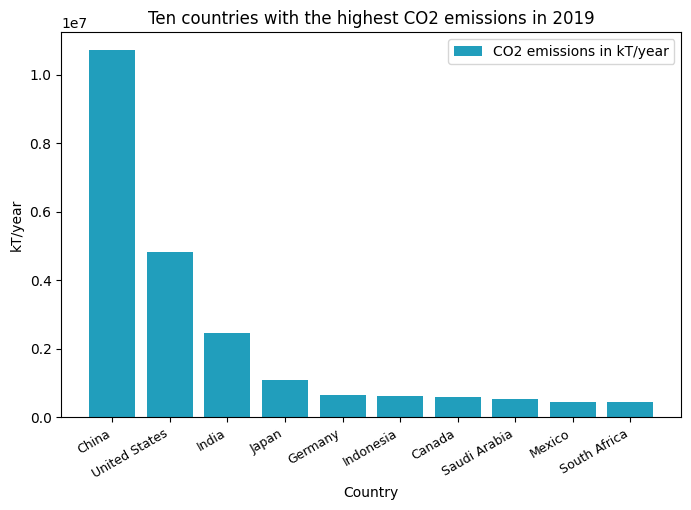

In [16]:
year_2019 = df[df['Year'] == 2019]
sort_CO2_emissions = year_2019.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)
top_10_CO2 = sort_CO2_emissions.head(10)

plt.bar(top_10_CO2['Entity'], top_10_CO2['Value_co2_emissions_kt_by_country'], color='#219ebc', label='CO2 emissions in kT/year')

rcParams['figure.figsize']=8,5
plt.title('Ten countries with the highest CO2 emissions in 2019')
plt.xlabel('Country')
plt.ylabel('kT/year')
plt.legend(loc=1)
plt.xticks(size='9', rotation=30,ha='right')
plt.show()

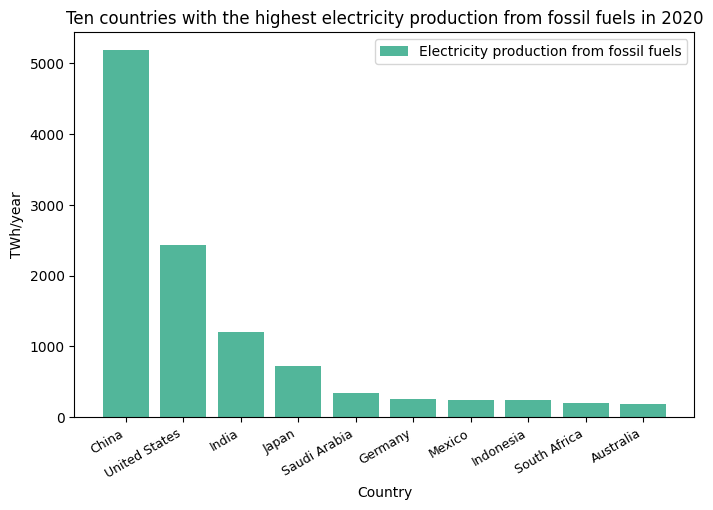

In [17]:
year_2020 = df[df['Year'] == 2020]
sort_e_fossil_fuels = year_2020.sort_values(by='Electricity from fossil fuels (TWh)', ascending=False)
top_10_fossil_fuels = sort_e_fossil_fuels.head(10)

plt.bar(top_10_fossil_fuels['Entity'], top_10_fossil_fuels['Electricity from fossil fuels (TWh)'], color='#52b69a', label='Electricity production from fossil fuels')

#Plot formatting
rcParams['figure.figsize']=8,5
plt.title('Ten countries with the highest electricity production from fossil fuels in 2020')
plt.xlabel('Country')
plt.ylabel('TWh/year')
plt.legend(loc=1)
plt.xticks(size='9', rotation=30, ha='right')
plt.show()

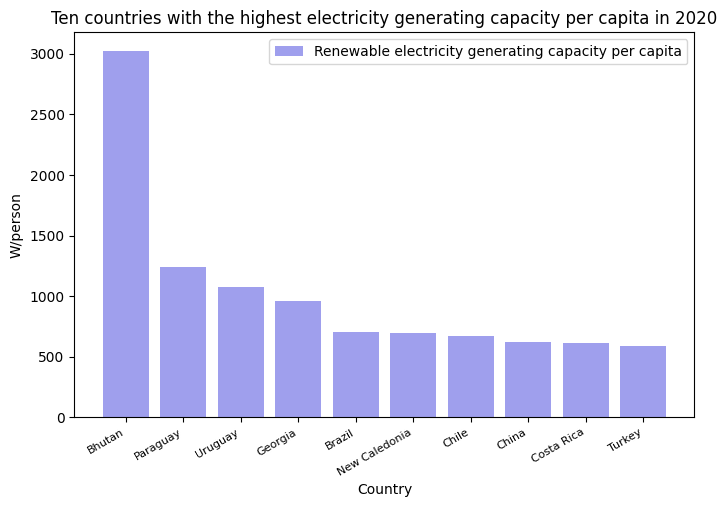

In [18]:
year_2020 = df[df['Year'] == 2020]
sort_ren_capacity = year_2020.sort_values(by='Renewable-electricity-generating-capacity-per-capita', ascending=False)
top_10_ren_capacity = sort_ren_capacity.head(10)

plt.bar(top_10_ren_capacity['Entity'], top_10_ren_capacity['Renewable-electricity-generating-capacity-per-capita'], color='#9f9fed', label='Renewable electricity generating capacity per capita')

plt.title('Ten countries with the highest electricity generating capacity per capita in 2020')
plt.xlabel('Country')
plt.ylabel('W/person')
plt.legend(loc=1)
plt.xticks(size='8', rotation=30,ha='right')
plt.show()

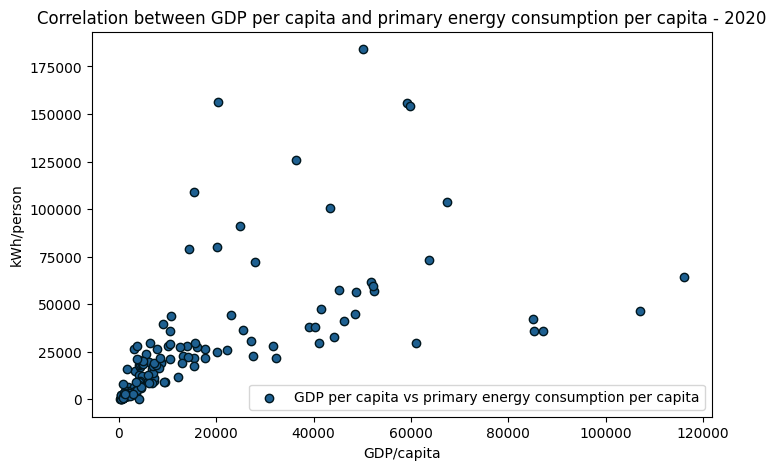

In [19]:
correlation_data = df[df['Year'] == 2020][['Entity', 'gdp_per_capita', 'Primary energy consumption per capita (kWh/person)']]

plt.scatter(correlation_data['gdp_per_capita'], correlation_data['Primary energy consumption per capita (kWh/person)'], color='#1e6091', edgecolors='#01161e', label='GDP per capita vs primary energy consumption per capita')

#Plot formatting
plt.title('Correlation between GDP per capita and primary energy consumption per capita - 2020')
plt.xlabel('GDP/capita')
plt.ylabel('kWh/person')
plt.legend(loc=4)
plt.show()